<a href="https://colab.research.google.com/github/lonespear/ma103/blob/main/ranger_school_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\textbf{Logistic Regression Explanation}

Logistic regression is a statistical method we use when we want to model the probability of a certain event happening. It's especially useful when the outcome is binary, meaning it has only two possible values (like "pass" or "fail," "win" or "lose"). In our case, we want to predict whether a cadet will pass Ranger School based on factors like their 12-mile ruck times.

\section*{Background Explanation}

Let's say we want to predict whether a cadet will pass Ranger School. If we only used linear regression, which fits a straight line, we might predict probabilities greater than 1 or less than 0, which doesn’t make sense since probabilities must be between 0 and 1. This is where \textbf{logistic regression} comes in—it’s designed to handle this problem.

Logistic regression predicts the probability of the binary outcome, and it uses an "S-shaped" curve called a \textbf{sigmoid function} to do this. The curve makes sure that our predictions stay within the range of 0 to 1.

\section*{Walkthrough of the Equations}

\subsection*{1. Linear Combination}
The first step in logistic regression is to form a linear combination of the input variables (e.g., 12-mile ruck time, number of push-ups). If we have one variable, \( x \), like the ruck time, the linear combination looks like this:

\[
z = \beta_0 + \beta_1 x
\]

- \( \beta_0 \) is the intercept, representing the baseline log-odds when \( x = 0 \).
- \( \beta_1 \) is the coefficient for the ruck time. It shows how a one-unit change in the ruck time affects the log-odds of passing Ranger School.

\subsection*{2. Sigmoid Function}
Once we have \( z \), the linear combination of the input, we apply the \textbf{sigmoid function} to convert it into a probability. The sigmoid function is defined as:

\[
P(y = 1 \mid x) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
\]

- This formula gives us the probability that a cadet will pass Ranger School (\( y = 1 \)) given their ruck time \( x \).
- The sigmoid function ensures that our predicted probabilities stay between 0 and 1, as probabilities should.

\subsection*{3. Interpreting the Output}
Once we calculate the probability, we can make a decision:
- If \( P(y = 1 \mid x) > 0.5 \), we predict that the cadet will pass Ranger School.
- If \( P(y = 1 \mid x) \leq 0.5 \), we predict that the cadet will not pass.

\section*{Example}

Let’s plug in some values to see how this works. Suppose we’ve found that the intercept \( \beta_0 = 2 \) and the coefficient for ruck time \( \beta_1 = -0.5 \). For a cadet who finishes their ruck march in 60 minutes (\( x = 60 \)):

1. First, compute \( z \):
   \[
   z = 2 + (-0.5 \times 60) = 2 - 30 = -28
   \]

2. Then, calculate the probability using the sigmoid function:
   \[
   P(y = 1 \mid x = 60) = \frac{1}{1 + e^{28}} \approx 0
   \]

This means that the probability of passing Ranger School with a 60-minute ruck time is almost zero. If a cadet finishes in 20 minutes, let's calculate again:

1. Compute \( z \):
   \[
   z = 2 + (-0.5 \times 20) = 2 - 10 = -8
   \]

2. Calculate the probability:
   \[
   P(y = 1 \mid x = 20) = \frac{1}{1 + e^{8}} \approx 0.00034
   \]

This shows that even though a 20-minute ruck time gives a slightly better chance of passing, it's still very low.



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/lonespear/ma103/refs/heads/main/Ranger_School_Data.csv')
df.drop('State', axis=1, inplace=True)
df['ln_score'].fillna(df['ln_score'].median(), inplace=True)
df = df[df['spr_raw'] <= 20]
df = df[df['hgt_in'] <= 100]
df = df[df['bmi'] <= 50]
df = df[df['rpa_pullups_raw'] <= 100]

<ipython-input-38-3cb42a252336>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ln_score'].fillna(df['ln_score'].median(), inplace=True)


In [39]:
df.head()

,Record Number,mdl_raw,mdl_points,spr_raw,spr_points,hrpu_raw,hpru_points,sdc_raw,sdc_points,plk_points,...,ln_score,acft_points,rpa_points,12mRuck_min,age,hgt_in,wt_lb,bmi,gender,Ranger_tab
0,1,240,78,8,75,42,82,87,100,100,...,10.0,535,364,135,28,71,170,23,1,1
2,3,170,64,5,62,10,60,103,80,60,...,8.0,413,327,182,26,67,148,23,0,1
3,4,260,82,9,79,25,67,99,98,76,...,7.0,490,322,129,28,74,189,23,1,1
4,5,340,100,10,83,53,93,84,100,100,...,9.0,576,375,130,28,70,180,25,1,1
5,6,300,90,12,97,44,84,78,100,94,...,8.0,565,367,123,28,69,184,26,1,1


In [40]:
df.rpa_pullups_raw.describe()

,rpa_pullups_raw
count,285.000000
mean,9.810526
std,5.433908
min,0.000000
25%,6.000000
50%,10.000000
75%,13.000000
max,25.000000


In [20]:
df.columns

Index(['Record Number', 'mdl_raw', 'mdl_points', 'spr_raw', 'spr_points',
       'hrpu_raw', 'hpru_points', 'sdc_raw', 'sdc_points', 'plk_points',
       'x2mr_raw', 'x2mr_points', 'rpa_pushups_raw', 'rpa_situps_raw',
       'rpa_5mi_sec', 'rpa_pullups_raw', 'ln_score', 'acft_points',
       'rpa_points', '12mRuck_min', 'age', 'hgt_in', 'wt_lb', 'bmi', 'gender',
       'Ranger_tab'],
      dtype='object')

In [21]:
df.describe()

,Record Number,mdl_raw,mdl_points,spr_raw,spr_points,hrpu_raw,hpru_points,sdc_raw,sdc_points,plk_points,...,ln_score,acft_points,rpa_points,12mRuck_min,age,hgt_in,wt_lb,bmi,gender,Ranger_tab
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,147.321678,251.328671,80.646853,8.576923,78.048951,32.059441,72.986014,102.807692,92.968531,73.828671,...,7.391608,486.377622,303.618881,161.115385,24.349650,69.727273,179.860140,25.237762,0.786713,0.314685
std,84.397398,58.047020,11.820786,2.312292,13.666108,11.728207,11.942251,17.577141,10.815310,25.429959,...,2.158736,65.037026,29.017445,34.487689,2.531926,3.523718,29.502923,2.793371,0.410346,0.465204
min,1.000000,130.000000,50.000000,3.000000,5.000000,0.000000,0.000000,76.000000,61.000000,0.000000,...,0.000000,256.000000,229.000000,38.000000,20.000000,60.000000,20.000000,17.000000,0.000000,0.000000
25%,75.250000,220.000000,74.000000,7.000000,69.000000,25.000000,67.000000,90.250000,90.000000,72.500000,...,7.000000,463.500000,284.000000,139.000000,22.000000,67.000000,163.000000,23.000000,1.000000,0.000000
50%,147.500000,260.000000,82.000000,9.000000,79.000000,34.000000,74.000000,97.500000,99.000000,80.000000,...,8.000000,505.000000,296.000000,152.000000,24.000000,70.000000,181.000000,25.000000,1.000000,0.000000
75%,220.750000,300.000000,90.000000,10.000000,87.000000,40.750000,80.750000,110.000000,100.000000,86.000000,...,9.000000,529.000000,325.000000,172.000000,27.000000,72.000000,198.000000,27.000000,1.000000,1.000000
max,293.000000,340.000000,100.000000,14.000000,100.000000,57.000000,97.000000,177.000000,100.000000,100.000000,...,10.000000,583.000000,375.000000,299.000000,28.000000,81.000000,270.000000,36.000000,1.000000,1.000000


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Ranger_tab', 'Record Number'], axis=1), df['Ranger_tab'], test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
# Access the Logistic Regression model within the pipeline
logistic_model = model.named_steps['logisticregression']

# Get the coefficients
coefficients = logistic_model.coef_[0]  # For binary classification, there's only one set of coefficients
intercept = logistic_model.intercept_[0]

# Print the coefficients and intercept
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# If you want to pair the coefficients with the feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame
coeff_dict = dict(zip(feature_names, coefficients))
print("Feature Coefficients:")
print(coeff_dict)

Intercept: -1.9949160388477343
Coefficients: [-0.22784014 -0.1118518   0.39527513  0.22538727  0.15843459 -0.43665942
 -1.19780679 -0.51093795 -0.09737729 -0.48416961 -0.05035786  0.10691502
  0.12503243  0.03347942  0.39289603  0.01545119 -0.0722645   0.71116352
 -3.62132862 -0.03366455 -0.26423706 -0.73305053 -0.43697091 -2.03565261]
Feature Coefficients:
{'mdl_raw': -0.2278401432728642, 'mdl_points': -0.11185180494255105, 'spr_raw': 0.39527512509535545, 'spr_points': 0.22538726579052729, 'hrpu_raw': 0.15843458926156243, 'hpru_points': -0.4366594153568564, 'sdc_raw': -1.1978067862811201, 'sdc_points': -0.5109379496149614, 'plk_points': -0.09737728866938766, 'x2mr_raw': -0.4841696141165243, 'x2mr_points': -0.05035786039658418, 'rpa_pushups_raw': 0.10691501851143109, 'rpa_situps_raw': 0.1250324347677866, 'rpa_5mi_sec': 0.03347942056146837, 'rpa_pullups_raw': 0.3928960349504792, 'ln_score': 0.015451186417974778, 'acft_points': -0.07226450386218362, 'rpa_points': 0.7111635193383188, '12m

# Confusion Matrix Breakdown:

For binary classification, the confusion matrix is structured like this:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive**  | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative**  | False Positive (FP)     | True Negative (TN)      |

- **True Positive (TP)**: The model correctly predicts the positive class.
- **False Positive (FP)**: The model incorrectly predicts the positive class (a "false alarm").
- **False Negative (FN)**: The model incorrectly predicts the negative class (a "miss").
- **True Negative (TN)**: The model correctly predicts the negative class.

# 1. Accuracy:
Accuracy is the ratio of the number of correct predictions (both positives and negatives) to the total number of predictions.

\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]

- **Numerator**: This represents all the correct predictions, both for the positive class (TP) and the negative class (TN).
- **Denominator**: This is the total number of instances (all four values from the confusion matrix).

# 2. Precision:
Precision focuses on the positive predictions. It tells us how many of the instances that were predicted as positive are actually positive. It's the ratio of true positives to the total number of predicted positives (which includes both true positives and false positives).

\[
\text{Precision} = \frac{TP}{TP + FP}
\]

- **Numerator**: This represents the number of true positives (correct positive predictions).
- **Denominator**: This is the total number of predicted positives, both correct (TP) and incorrect (FP).

# Intuitive Explanation:
- **Accuracy** answers: "Out of all predictions, how many did we get right?"
- **Precision** answers: "Out of all the instances predicted as positive, how many were actually positive?"

# Explanation:
Let's say you have a model and a confusion matrix like this:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive**  | 12 (TP)              | 4 (FN)            |
| **Actual Negative**  | 3 (FP)               | 39 (TN)            |

### Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{12 + 39}{12 + 39 + 3 + 4} = \frac{52}{59} = 0.881 \text{ or } 88.1\%
$$

### Precision:
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{12}{12 + 3} = \frac{12}{15} \approx 0.8 \text{ or } 80\%
$$


- **Accuracy**: Your model made 52 correct predictions out of 59 total instances, so the accuracy is 88%.
- **Precision**: Of the 15 instances the model predicted as positive, 12 were actually positive, giving you a precision of 80%.

This approach lets you manually calculate and explain these metrics using the actual components of the confusion matrix.


In [29]:
mean_squared_error(y_test, y_pred)

0.10344827586206896

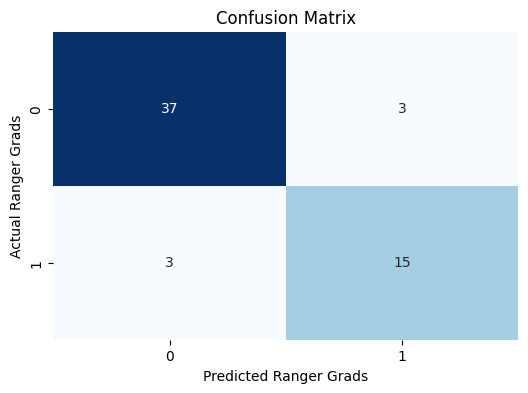

In [30]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Ranger Grads')
plt.ylabel('Actual Ranger Grads')
plt.show()

            Feature  Coefficient  Importance
18      12mRuck_min    -3.621329    3.621329
23           gender    -2.035653    2.035653
6           sdc_raw    -1.197807    1.197807
21            wt_lb    -0.733051    0.733051
17       rpa_points     0.711164    0.711164
7        sdc_points    -0.510938    0.510938
9          x2mr_raw    -0.484170    0.484170
22              bmi    -0.436971    0.436971
5       hpru_points    -0.436659    0.436659
2           spr_raw     0.395275    0.395275
14  rpa_pullups_raw     0.392896    0.392896
20           hgt_in    -0.264237    0.264237
0           mdl_raw    -0.227840    0.227840
3        spr_points     0.225387    0.225387
4          hrpu_raw     0.158435    0.158435
12   rpa_situps_raw     0.125032    0.125032
1        mdl_points    -0.111852    0.111852
11  rpa_pushups_raw     0.106915    0.106915
8        plk_points    -0.097377    0.097377
16      acft_points    -0.072265    0.072265
10      x2mr_points    -0.050358    0.050358
19        

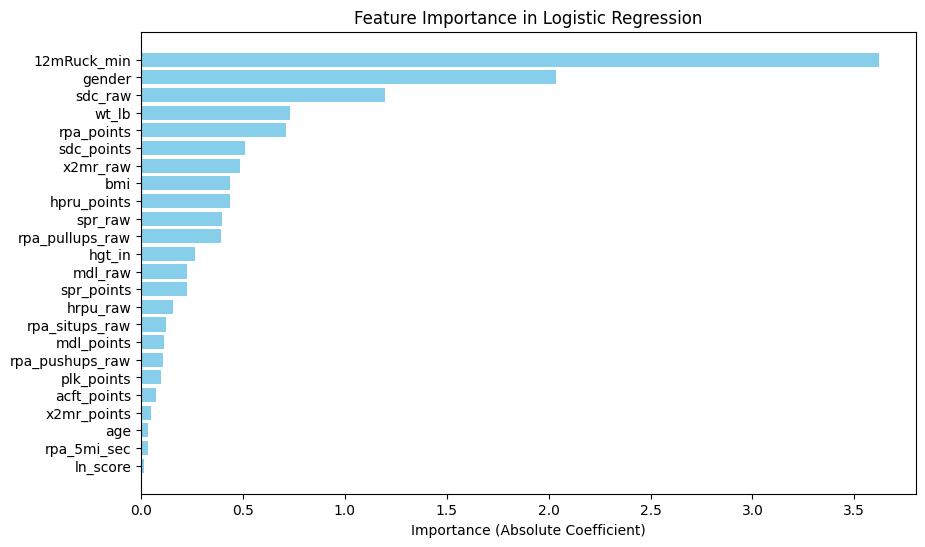

In [31]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)  # Taking absolute value for importance
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient)')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
# Extract the coefficient for the 12-mile ruck time feature
ruck_time_coefficient = logistic_model.coef_[0][X_train.columns.get_loc('12mRuck_min')]

# Calculate the odds ratio
odds_ratio = np.exp(ruck_time_coefficient / np.std(X_train['12mRuck_min']))

# Convert odds ratio to percentage change in passing odds
percentage_change = (odds_ratio - 1) * 100

print(f"If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by {percentage_change:.2f}%")

If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by -10.01%


In [ ]:
# Extract the coefficient for the 12-mile ruck time feature
gender_coefficient = logistic_model.coef_[0][X_train.columns.get_loc('gender')]

# Calculate the odds ratio
odds_ratio = np.exp(gender_coefficient * np.std(X_train['gender']))

# Convert odds ratio to percentage change in passing odds
percentage_change = (odds_ratio - 1) * 100

print(f"If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by {percentage_change:.2f}%")

If you increase your 12-mile ruck time by 1 minute, the odds of passing Ranger School change by -48.26%


In [ ]:
df['12mRuck_min'].describe()

,12mRuck_min
count,289.000000
mean,161.211073
std,34.390533
min,38.000000
25%,139.000000
50%,152.000000
75%,172.000000
max,299.000000


In [ ]:
df.loc[df['12mRuck_min'] <= 240].Ranger_tab.value_counts()

,count
Ranger_tab,
0,182
1,91


In [35]:
model.predict_proba(X_test.iloc[[5]])

array([[0.92452132, 0.07547868]])

In [34]:
X_test.iloc[5]

,156
mdl_raw,340.0
mdl_points,100.0
spr_raw,11.0
spr_points,92.0
hrpu_raw,46.0
hpru_points,86.0
sdc_raw,88.0
sdc_points,100.0
plk_points,80.0
x2mr_raw,969.0


In [49]:
colnames = X_train.columns.tolist()

In [50]:
colnames

['mdl_raw',
 'mdl_points',
 'spr_raw',
 'spr_points',
 'hrpu_raw',
 'hpru_points',
 'sdc_raw',
 'sdc_points',
 'plk_points',
 'x2mr_raw',
 'x2mr_points',
 'rpa_pushups_raw',
 'rpa_situps_raw',
 'rpa_5mi_sec',
 'rpa_pullups_raw',
 'ln_score',
 'acft_points',
 'rpa_points',
 '12mRuck_min',
 'age',
 'hgt_in',
 'wt_lb',
 'bmi',
 'gender']

In [63]:
a_hr = pd.read_csv('a_hr_sim_ranger.csv')
names = a_hr.iloc[:,0].values.tolist()
a_hr_test = a_hr.iloc[:,1:]
a_hr_test.columns = colnames
probs = model.predict_proba(a_hr_test)
preds = model.predict(a_hr_test)
pass_probs = probs[:, 1]  # Probability of passing (class 1)
fail_probs = probs[:, 0]  # Probability of failing (class 0)

# Create the results DataFrame
results = pd.DataFrame({
    'Names': names,
    'Pass_Prob': pass_probs,
    'Fail_Prob': fail_probs,
    'Prediction': preds
})

In [64]:
results

,Names,Pass_Prob,Fail_Prob,Prediction
0,Burt Reynolds,0.247274,0.752726,0
